# Getting data

In [1]:
from typing import Any, Optional

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

RANDOM_STATE = 12345

In [2]:
bank_data = pd.read_csv("datasets/bank_clients_data.csv")
display(bank_data.sample(20, random_state=RANDOM_STATE))

children  days_employed  dob_years            education  education_id  \
10494         0    -777.565227         41              среднее             1   
1460          3   -2789.878442         31              среднее             1   
9914          0            NaN         58               высшее             0   
3165          0  329050.424240         59            начальное             3   
3080          0  360739.755029         51               высшее             0   
14925         0  368945.757693         62              среднее             1   
6437          2   -3173.437878         29              среднее             1   
20182         0   -3288.307489         44  неоконченное высшее             2   
2661          0  336548.862836         64              среднее             1   
4599          2    -528.394952         26               ВЫСШЕЕ             0   
12975         1            NaN         38              среднее             1   
7901          0            NaN         59              среднее             1   
20613         0   -4137.331615         69               высшее             0   
17092         2   -2826.964554         43              среднее             1   
5046          0    -423.938041         24              среднее             1   
14986         0   -3690.815732         36              среднее             1   
3621          0   -1587.837522         55              среднее             1   
18517         0    -537.327354         24               ВЫСШЕЕ             0   
4844          2   -2716.177578         36              среднее             1   
16233         0            NaN         61              СРЕДНЕЕ             1   

               family_status  family_status_id gender  income_type  debt  \
10494       гражданский брак                 1      M    сотрудник     0   
1460         женат / замужем                 0      M    сотрудник     0   
9914         женат / замужем                 0      M    сотрудник     0   
3165          вдовец / вдова                 2      F    пенсионер     0   
3080         женат / замужем                 0      M    пенсионер     0   
14925       гражданский брак                 1      F    пенсионер     0   
6437         женат / замужем                 0      M    сотрудник     0   
20182  Не женат / не замужем                 4      M    компаньон     0   
2661   Не женат / не замужем                 4      F    пенсионер     0   
4599         женат / замужем                 0      M    компаньон     0   
12975        женат / замужем                 0      F    сотрудник     0   
7901         женат / замужем                 0      F    пенсионер     0   
20613        женат / замужем                 0      M  госслужащий     0   
17092        женат / замужем                 0      M    сотрудник     0   
5046   Не женат / не замужем                 4      M    сотрудник     0   
14986  Не женат / не замужем                 4      F    сотрудник     0   
3621         женат / замужем                 0      F    сотрудник     0   
18517       гражданский брак                 1      F    сотрудник     0   
4844         женат / замужем                 0      F    сотрудник     0   
16233        женат / замужем                 0      M    сотрудник     0   

        total_income                                 purpose  
10494  166520.601913              дополнительное образование  
1460   115323.047716              строительство недвижимости  
9914             NaN                              автомобили  
3165   296160.300798   получение дополнительного образования  
3080   184394.932593         операции со своей недвижимостью  
14925  144149.728877                         сыграть свадьбу  
6437    79874.036949                    покупка своего жилья  
20182  216611.469978              покупка жилой недвижимости  
2661    82212.733538                             образование  
4599   171056.175618                    покупка недвижимости  
12975            NaN                

In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


We can see that the DataFrame contains the following information in its columns:

<table>
<thead>
<tr><th>Features</th><th>Description</th></tr>
</thead>
<tbody>
<tr><td><code>children</code></td><td><i>Number of children in a family</i></td></tr>
<tr><td><code>days_employed</code></td><td><i>Total number of days being employed</i></td></tr>
<tr><td><code>dob_years</code></td><td><i>Client's age</i></td></tr>
<tr><td><code>education</code></td><td><i>Client's education level</i></td></tr>
<tr><td><code>education_id</code></td><td><i>Education level identifier</i></td></tr>
<tr><td><code>family_status</code></td><td><i>Client's family status</i></td></tr>
<tr><td><code>family_status_id</code></td><td><i>Family status identifier</i></td></tr>
<tr><td><code>gender</code></td><td><i>Client's gender</i></td></tr>
<tr><td><code>income_type</code></td><td><i>Type of employment</i></td></tr>
<tr><td><code>debt</code></td><td><i>Indicator of owing debt to the bank</i></td></tr>
<tr><td><code>total_income</code></td><td><i>Monthly income</i></td></tr>
<tr><td><code>purpose</code></td><td><i>Purpose for taking out a loan</i></td></tr>
</tbody>
</table>

**Conclusion**

The dataset contains information about borrowers of the bank with numerous attributes, where each row identifies a separate debtor with specific data. The DataFrame can be seen to have missing values present as well as potential data format problems, all of which warrant data preprocessing being carried out.

# Data preprocessing

## Missing values

In [4]:
def identify_missing_values(data: pd.DataFrame) -> Optional[pd.DataFrame]:
    """Performs missing values computation.

    Computes a number and share of missing values
    in DataFrame columns which have NaN-values present
    and displays data types of such columns.

    Args:
        data (pd.DataFrame): DataFrame which needs to
            be checked for missing values.

    Returns:
        Optional[pd.DataFrame]: DataFrame with column names, number of
        missing values and shares of NaN-values in such columns.
        In case there are not missing values present, an according
        message is shown and nothing is returned. Additionally, columns
        data type is shown.
    """
    # Verifying missing values
    miss_vals_num = data.isnull().sum()[data.isnull().sum() > 0]
    if miss_vals_num.empty:
        print("Missing values are not found.")
        return
    # Creating a table with numbers of missing values
    cols = {"missing_count": miss_vals_num.values}
    nans_df = pd.DataFrame(data=cols, index=miss_vals_num.index).sort_values(
        by="missing_count", ascending=False
    )
    # Adding shares of missing values
    nans_df["missing_fraction"] = nans_df["missing_count"] / data.shape[0]
    nans_df["missing_fraction"] = nans_df["missing_fraction"].round(4)
    # Adding data types
    nans_df["dtype"] = data[nans_df.index].dtypes
    nans_df = nans_df[["dtype", "missing_count", "missing_fraction"]]

    return nans_df

In [5]:
# Computing the number and percentage of missing values in the DataFrame
identify_missing_values(data=bank_data)

dtype  missing_count  missing_fraction
days_employed  float64           2174             0.101
total_income   float64           2174             0.101

We see that there are two columns that contain missing values: `days_employed` and `total_income`. Deal first with the latter column. In order to get rid of missing values, we need to understand what the variable represents. `total_income` stores information about clients' incomes, meaning that the column possesses numeric values. Income is dependent upon type of employment shown in `income_type` and therefore we can fill in missing values with median income relative to a particular employment type.

In [6]:
# Filling in missing values with median in 'total_income' column depending on 'income_type'
for inc_type in bank_data["income_type"].unique():
    bank_data.loc[
        (bank_data["income_type"] == inc_type) & (bank_data["total_income"].isna()),
        "total_income",
    ] = bank_data.loc[(bank_data["income_type"] == inc_type), "total_income"].median()

## Abnormalities

As can be seen from the data, we have abnormal values found in `days_employed` column: by no means can duration of employment be negative. Thus, we are dealing with abnormalities in the data. We can easily fix this by taking the absolute value of each data point in this column.

In [7]:
# Converting the data to a correct format
bank_data["days_employed"] = np.absolute(bank_data["days_employed"])

Let's further explore this column and display median employment duration in relation to employment type.

In [8]:
# Displaying median values
bank_data.groupby("income_type")["days_employed"].agg("median")

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

We see that some income types, specifically, unemployed (`безработный`) and retired (`пенсионер`) have unusually high values. It is difficult to deal with this kind of abnormalities and since this column will be very informative to use in the subsequent analysis, we just leave the data as it is here.

Now, display the possible unique numbers of children that borrowers have.

In [9]:
print(bank_data["children"].sort_values().unique())

[-1  0  1  2  3  4  5 20]


It is clearly seen that there are two impossible values: 20 and -1. Let's get rid of them.

In [10]:
# Getting rid of abnormal values
bank_data = bank_data[bank_data["children"].between(0, 5)]
print(bank_data["children"].sort_values().unique())

[0 1 2 3 4 5]


## Missing values (cont.)

Now we can fill in missing values in `days_employed` column with their median values depending on income type.

In [11]:
# Filling in missing values with median in 'days_employed' column depending on 'income_type'
for inc_type in bank_data["income_type"].unique():
    bank_data.loc[
        (bank_data["income_type"] == inc_type) & (bank_data["days_employed"].isna()),
        "days_employed",
    ] = bank_data.loc[(bank_data["income_type"] == inc_type), "days_employed"].median()

In [12]:
identify_missing_values(data=bank_data)

Missing values are not found.


## Data type changes

Let's change the data in `total_income` column from `float64` to `int64` for convenience. 

In [13]:
bank_data["total_income"] = bank_data["total_income"].astype("int64")

## Duplicates

We have some implicit duplicates in `education` column, specifically, using both capital and small letters to write down the same education level. Thus, let's convert all values in this column to strings with lowercase letters.

In [14]:
bank_data["education"] = bank_data["education"].str.lower()

Now, we can take a look how many explicit duplicates (identical DataFrame rows) we have.

In [15]:
def preprocess_duplicates(data: pd.DataFrame) -> None:
    """Computes and deletes all duplicates in the DataFrame."""
    num_duplicates = data.duplicated().sum()
    if num_duplicates != 0:
        data.drop_duplicates(inplace=True)
        print(f"{num_duplicates:,} duplicates found and deleted.")
        return
    print("No duplicates found.")

In [16]:
preprocess_duplicates(data=bank_data)

71 duplicates found and deleted.


## Data categorization

### Income

To make further data analysis more convenient, let's create a categorical variable that will classify clients' incomes (in roubles) according to the following ranges:

* 0-30,000 => `E`
* 30,001-50,000 => `D`
* 50,001-200,000 => `C`
* 200,001-1,000,000 => `B`
* 1,000,001 and higher => `A`

For instance, a borrower with monthly income of, say, 200500 roubles will be put in `B` income category. We can easily program such a categorization by using `cut()` function of `pandas` library in order to be able to categorize the data in `total_income` column in accordance with ranges and income group identifiers defined above.

In [17]:
# Classifying into income groups
bank_data["total_income_category"] = pd.cut(
    bank_data["total_income"],
    bins=[0, 30000, 50000, 200000, 1000000, np.max(bank_data["total_income"])],
    labels=["E", "D", "C", "B", "A"],
)

bank_data["total_income_category"] = bank_data["total_income_category"].astype("object")
print(bank_data["total_income_category"].sort_values().unique())

['A' 'B' 'C' 'D' 'E']


### Loan purpose

Next, consider possible purposes that clients taking out loans may have.

In [18]:
# Printing unique purposes of taking a loan
print(bank_data["purpose"].sort_values().unique())

['автомобили' 'автомобиль' 'высшее образование'
 'дополнительное образование' 'жилье' 'заняться высшим образованием'
 'заняться образованием' 'на покупку автомобиля'
 'на покупку подержанного автомобиля' 'на покупку своего автомобиля'
 'на проведение свадьбы' 'недвижимость' 'образование' 'операции с жильем'
 'операции с коммерческой недвижимостью' 'операции с недвижимостью'
 'операции со своей недвижимостью' 'покупка жилой недвижимости'
 'покупка жилья' 'покупка жилья для сдачи' 'покупка жилья для семьи'
 'покупка коммерческой недвижимости' 'покупка недвижимости'
 'покупка своего жилья' 'получение высшего образования'
 'получение дополнительного образования' 'получение образования'
 'приобретение автомобиля' 'профильное образование' 'ремонт жилью'
 'свадьба' 'свой автомобиль' 'сделка с автомобилем'
 'сделка с подержанным автомобилем' 'строительство жилой недвижимости'
 'строительство недвижимости' 'строительство собственной недвижимости'
 'сыграть свадьбу']


We can see that it seems that there are lost of reasons for taking out loans in a bank, including real estate (`жилье`), buying a car (`автомобиль`), wedding (`свадьба`) and education (`образование`). But, in fact, all these purposes are simply written differently but actually refer to similar things. Hence, it is possible to also classify all these reasons into purpose categories. In order to accomplish this, we can use `categorize_purpose()` function we define below and use `apply()` method on it. Specifically, we will check if the word stem of a loan purpose (`жилье`, `автомобиль`, `свадьба` or `образование`) is included into the full purpose of taking out a loan and then classify these purposes accordingly into 4 categories:

* `Car`
* `Real estate`
* `Wedding`
* `Education`

Purposes that are different from these will be allocated to `Other`.

In [19]:
def categorize_purpose(loan_purpose: str) -> str:
    """Classifies people into loan purpose categories depending on loan purpose."""
    loan_purpose = loan_purpose.lower()
    if "автом" in loan_purpose:
        return "Car"
    elif "жил" in loan_purpose or "недвиж" in loan_purpose:
        return "Real estate"
    elif "свад" in loan_purpose:
        return "Wedding"
    elif "образов" in loan_purpose:
        return "Education"
    else:
        return "Other"

In [20]:
# Applying the function to the DataFrame column
bank_data["purpose_category"] = bank_data["purpose"].apply(categorize_purpose)
print(bank_data["purpose_category"].sort_values().unique())

['Car' 'Education' 'Real estate' 'Wedding']


### Family status

Let's use the same logic and categorize family statuses into 5 categories:

* `Unmarried`
* `Divorced`
* `Widow(er)`
* `Civil` => civil marriage
* `Married`

It can be achieved by using another defined function - `categorize_family_status()`.

In [21]:
def categorize_family_status(family_status: str) -> str:
    """Classifies people into family status categories depending on family status."""
    family_status = family_status.lower()
    if "не жен" in family_status or "не замуж" in family_status:
        return "Unmarried"
    elif "разв" in family_status:
        return "Divorced"
    elif "вдов" in family_status:
        return "Widow(er)"
    elif "гражд" in family_status:
        return "Civil"
    elif "жен" in family_status or "замуж" in family_status:
        return "Married"
    else:
        return "Other"

In [22]:
print(bank_data["family_status"].sort_values().unique())

['Не женат / не замужем' 'в разводе' 'вдовец / вдова' 'гражданский брак'
 'женат / замужем']


In [23]:
bank_data["family_status_category"] = bank_data["family_status"].apply(
    categorize_family_status
)
print(bank_data["family_status_category"].sort_values().unique())

['Civil' 'Divorced' 'Married' 'Unmarried' 'Widow(er)']


**Conclusion**

We have managed to properly preprocess data by dealing with missing and abnormal values, changing the format of data and deleting duplicates, both expicit and implicit. 

Omissions in the source data were noted in the columns `days_employed` and `total_income`. One possible reason for missing data may be the failure of an automated system for collecting information about borrowers. For example, when a borrower specifies information about themselves in a form on a website and does not specify some information, the website may not notice this and simply send the information further (if the programmer forgot to make some cells mandatory). Another reason may be a purely human factor: if a borrower comes to the bank and tells the bank employee information about themselves, an employee may simply make a mistake in something and forget to specify the data, which will result in the appearance of `NaN` values in the data.

Besides, we have managed to fill in missing values by using a median. As a rule, there are "outliers" in quantitative variables - values that are very different from other values in a particular column. The use of average values can distort the data in this case and in order to avoid this, a median is used, which will take into account such sharply distinguished values and will not exaggerate the estimate of the missing value.

Next step is to actually start conducting creditworthiness analysis itself.

# Solvency determinants analysis

Now that the data has been preprocessed, we can get to analyzing possible factors that determine the ability of bank's clients to repay a loan on time. We will conduct the analysis by considering multiple features:

    1. Number of children. 
    2. Family status.
    3. Total income. 
    4. Purpose of a loan. 
    
We will compute some descriptive statistics about the borrowers. In order not to repeat the code over and over again, let's use `show_solvency_by_cat()` that will calculate the number of borrowers, including those in debt and those who repaid the loan, as well as the share of people who do not have debt, depending on a specific feature of the bank clients. 

In [24]:
def show_solvency_by_cat(feature: str, data: pd.DataFrame) -> pd.DataFrame:
    """
    Displays solvency statistics for borrowers by category
    of a feature.

    Args:
        feature (str): Characteristic of borrowers.
        data (pd.DataFrame): Bank clients' data.

    Returns:
        pd.DataFrame: Object with solvency statistics for
        each unique element of feature.
    """
    data_grouped = data.groupby(feature).agg({"debt": ["count", "sum"]})

    # Number of borrowers who managed to repay on time
    data_grouped["no_debt"] = (
        data_grouped["debt"]["count"] - data_grouped["debt"]["sum"]
    )

    # Computing debt repayment ratio
    data_grouped["no_debt_share"] = np.round(
        data_grouped["no_debt"] / data_grouped["debt"]["count"], 4
    )

    # Getting rid of multiindex
    data_grouped.columns = [
        "total_borrowers",
        "has_debt",
        "no_debt",
        "repay_ratio",
    ]

    solvency_info = data_grouped.copy()

    return solvency_info

Since reading statistics in a DataFrame may sometimes be inconvenient, let's add visualization part here as well. Hence, we will make figures by `plot_solvency_by_cat()` function that will create a set of subplots for each category of a specific feature.

In [25]:
def plot_solvency_by_cat(feature: str, data: pd.DataFrame) -> Any:
    """
    Plots solvency statistics for borrowers by category
    of feature.

    Creates two plots:
        - Left one depicts the number of borrowers who repayed
            and did not repay the loan for each category within feature.
        - Right plot shows debt repayment ratios for each category of
            clients within feature.

    Args:
        feature (str): Characteristic of borrowers.
        data (pd.DataFrame): Bank clients' data.
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f"Solvency of clients by {feature}")

    # Plotting the number of borrowers
    figure_left = sns.barplot(
        x=feature,
        y="debt",
        data=data,
        estimator=lambda x: len(x),
        ci=None,
        hue="debt",
        ax=axes[0],
    )
    axes[0].legend(title="Status", loc="upper right", labels=["Repaid", "In debt"])
    axes[0].set_title("Number of borrowers by categories")
    axes[0].set_ylabel("People")

    # Plotting the debt repayment ratio
    figure_right = sns.barplot(
        x=feature,
        y="debt",
        data=data,
        estimator=lambda x: 100 - sum(x) / len(x) * 100,
        ci=None,
        ax=axes[1],
        color="dodgerblue",
    )
    axes[1].set_title("Repayment rate by categories")
    axes[1].set_ylabel("Percent")

    # Responsively setting y-limits for the right plot
    repay_rate = (
        data.groupby(feature)["debt"].sum() / data.groupby(feature)["debt"].count()
    )
    lower_bound = (100 - 100 * np.max(repay_rate)) - 0.5
    upper_bound = (100 - 100 * np.min(repay_rate)) + 0.5
    axes[1].set_ylim(lower_bound, upper_bound)

    plt.tight_layout()

## Number of children

In [26]:
# Computing the number of borrowers in each children group
bank_data["children"].value_counts()

0    14091
1     4808
2     2052
3      330
4       41
5        9
Name: children, dtype: int64

To begin with, let's calculate the total number of borrowers by the number of children using `value_counts()` method in the `children` column. It can be seen that the number of borrowers broken down by each group varies quite widely, which suggests that people with a large number of children do not take out loans so often.

In [27]:
solvency_children = show_solvency_by_cat(feature="children", data=bank_data)
display(solvency_children)

total_borrowers  has_debt  no_debt  repay_ratio
children                                                 
0                   14091      1063    13028       0.9246
1                    4808       444     4364       0.9077
2                    2052       194     1858       0.9055
3                     330        27      303       0.9182
4                      41         4       37       0.9024
5                       9         0        9       1.0000

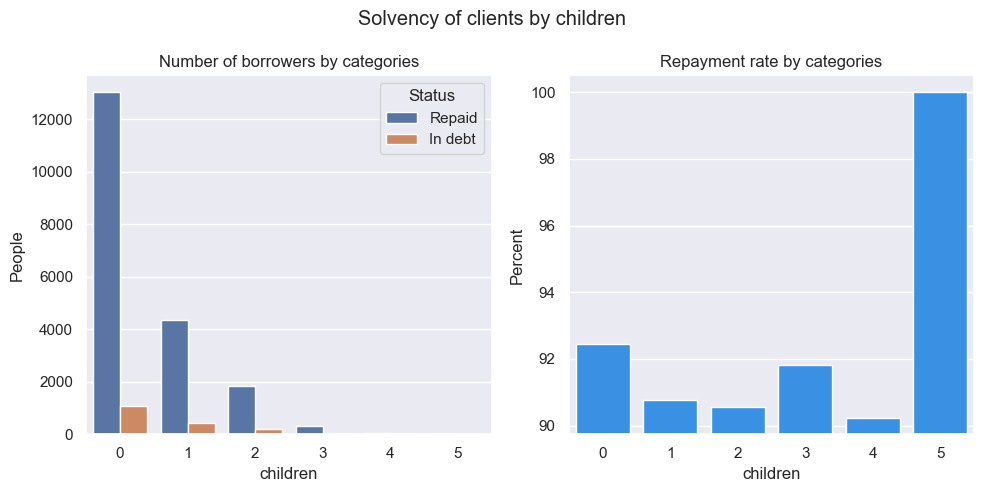

In [28]:
sns.set_theme(style="darkgrid")
plot_solvency_by_cat(feature="children", data=bank_data)

Let's look at the data from the bank's point of view and use as a metric of loan repayment on time - "the proportion of people who have paid off a loan on time in a certain group" (`repay_ratio`). It can be seen that samples of borrowers with three or more children do not have many observations, especially for a group of people with five children. In other words, such samples are not representative enough and therefore it makes sense to compare samples with 0, 1 and 2 children only.

In [29]:
# Printing a table for subsamples of borrowers with 0, 1, 2 children
solvency_children.loc[solvency_children["total_borrowers"] > 2000].sort_values(
    by="repay_ratio", ascending=False
)

total_borrowers  has_debt  no_debt  repay_ratio
children                                                 
0                   14091      1063    13028       0.9246
1                    4808       444     4364       0.9077
2                    2052       194     1858       0.9055

Considering this grouping, it is obvious that with a larger number of children, the probability of repayment of the loan decreases: childless borrowers repay the loan on time in about 92.5% of cases, while for borrowers with a large number of children, this indicator is in the region of 90-91%. In other words, the repayment of the loan on time has an inverse relationship with the number of children of the borrower.

## Family status

In [30]:
# Computing the number of borrowers in each group by family status
bank_data["family_status_category"].value_counts()

Married      12261
Civil         4134
Unmarried     2796
Divorced      1189
Widow(er)      951
Name: family_status_category, dtype: int64

Let's apply the same strategy and look at the number of borrowers by marital status. Mostly loans are taken by people who are married, and least of all by borrowers without official relations - widower/widow and divorced. However, this does not mean that people who take out loans less often pay less on time.

In [31]:
solvency_family_status = show_solvency_by_cat(
    feature="family_status_category", data=bank_data
)
display(solvency_family_status)

total_borrowers  has_debt  no_debt  repay_ratio
family_status_category                                                 
Civil                              4134       385     3749       0.9069
Divorced                           1189        84     1105       0.9294
Married                           12261       927    11334       0.9244
Unmarried                          2796       273     2523       0.9024
Widow(er)                           951        63      888       0.9338

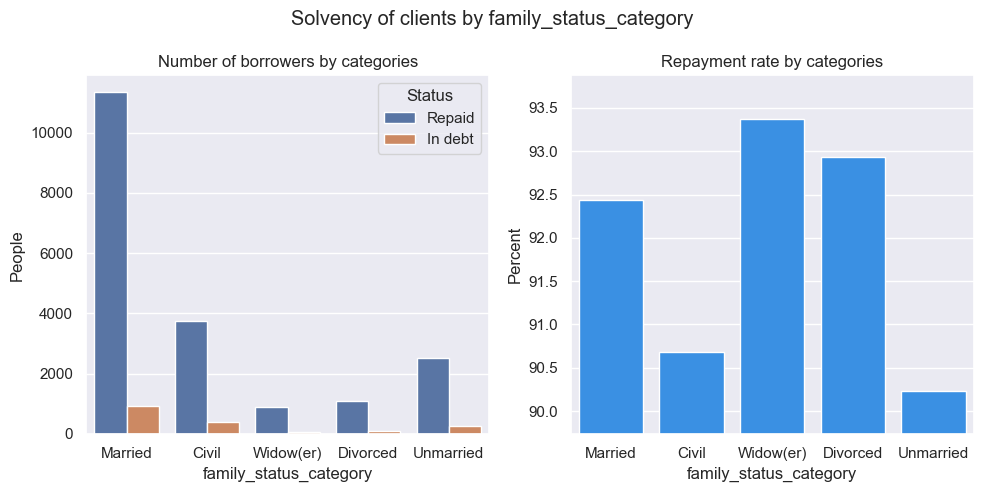

In [32]:
plot_solvency_by_cat(feature="family_status_category", data=bank_data)

As in the previous point, the number of observations in each sample has a fairly strong influence on the results of the study, since a smaller sample will absorb less information, thus distorting them. Therefore, in this case it makes sense to consider categories that include, say, more than 2000 people. Thus, we will exclude the categories of widower/widows and divorced from the analysis and consider others.

In [33]:
# Considering a subsample
solvency_family_status.loc[
    solvency_family_status["total_borrowers"] > 2000
].sort_values(by="repay_ratio", ascending=False)

total_borrowers  has_debt  no_debt  repay_ratio
family_status_category                                                 
Married                           12261       927    11334       0.9244
Civil                              4134       385     3749       0.9069
Unmarried                          2796       273     2523       0.9024

Now the dependence is more clearly traced: more family people are more responsible for timely repayment of debt, which is manifested in a high value of the share of refunds for such categories of borrowers. Thus, we have a direct relationship between the "formality" of family relations and the repayment of the loan on time.

## Total income

In [34]:
# Computing the number of borrowers in each group by income
bank_data["total_income_category"].value_counts()

C    15921
B     5014
D      349
A       25
E       22
Name: total_income_category, dtype: int64

In [35]:
solvency_income = show_solvency_by_cat(feature="total_income_category", data=bank_data)
display(solvency_income)

total_borrowers  has_debt  no_debt  repay_ratio
total_income_category                                                 
A                                   25         2       23       0.9200
B                                 5014       354     4660       0.9294
C                                15921      1353    14568       0.9150
D                                  349        21      328       0.9398
E                                   22         2       20       0.9091

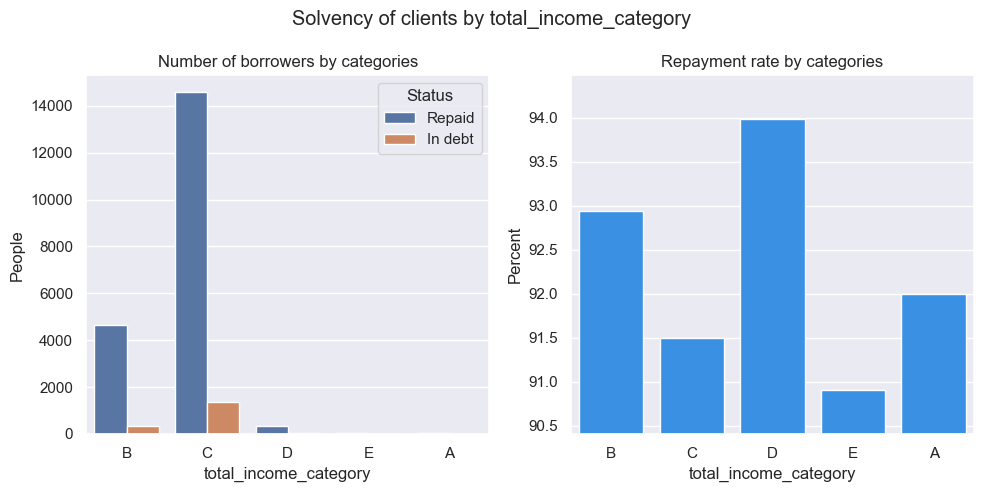

In [36]:
plot_solvency_by_cat(feature="total_income_category", data=bank_data)

The results show a similar situation: the number of borrowers of categories A, E and D is extremely small, which may affect the results of the study. Borrowers in these groups are underrepresented and it would be better to exclude them from the analysis and consider the remaining categories.

In [37]:
# Considering a subsample
solvency_income.loc[solvency_income["total_borrowers"] > 2000].sort_values(
    by="repay_ratio", ascending=False
)

total_borrowers  has_debt  no_debt  repay_ratio
total_income_category                                                 
B                                 5014       354     4660       0.9294
C                                15921      1353    14568       0.9150

So, we can see that the higher the borrower's income category, the higher the probability of debt repayment, so we have a direct relationship between these two variables.

## Loan purpose

In [38]:
# Computing the number of borrowers in each group by loan purpose
bank_data["purpose_category"].value_counts()

Real estate    10751
Car             4279
Education       3988
Wedding         2313
Name: purpose_category, dtype: int64

In [39]:
solvency_loan_purpose = show_solvency_by_cat(feature="purpose_category", data=bank_data)
display(solvency_loan_purpose)

total_borrowers  has_debt  no_debt  repay_ratio
purpose_category                                                 
Car                          4279       400     3879       0.9065
Education                    3988       369     3619       0.9075
Real estate                 10751       780     9971       0.9274
Wedding                      2313       183     2130       0.9209

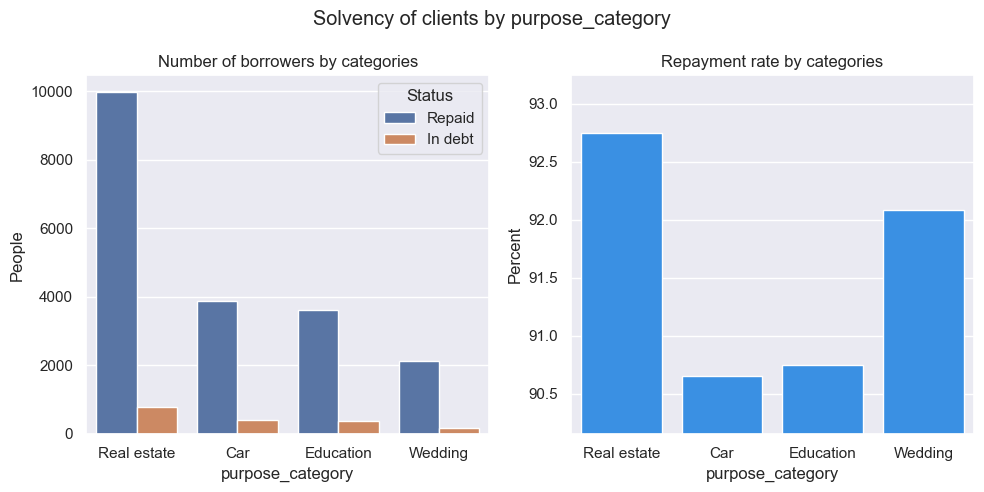

In [40]:
plot_solvency_by_cat(feature="purpose_category", data=bank_data)

In [41]:
solvency_loan_purpose.loc[solvency_loan_purpose["total_borrowers"] > 2000].sort_values(
    by="repay_ratio", ascending=False
)

total_borrowers  has_debt  no_debt  repay_ratio
purpose_category                                                 
Real estate                 10751       780     9971       0.9274
Wedding                      2313       183     2130       0.9209
Education                    3988       369     3619       0.9075
Car                          4279       400     3879       0.9065

Basically, loans are predominantly taken for real estate transactions and, moreover, borrowers of this group more often repay loans, so this direction of lending should be considered by bank analysts.

**Conclusion**

By considering separate solvency-affecting factors, we have managed to identify possible profit-enhacing channels that a bank can focus on.

# Conclusion

So, in this study, the statistics of the solvency of customers of a credit institution have been analyzed. To obtain the results, the data obtained was carefully preprocessed: duplicates were removed, abnormal and missing values were processed, and data categorization was carried out to simplify further data analysis.

Based on the results of the study, the following conclusion can be drawn. In order for the bank to increase its profits, the following groups of borrowers are the most profitable sources of funds for the bank:

* Childless;

* Married;

* People with salaries from 200,000 to 1,000,000 roubles;

* People taking out loans for real estate transactions.

In the future, it is recommendable that in the process of collecting data, a more careful approach to their processing is applied. In particular, it is advisable that missing values in the data be processed appropriately at the stage of sending them for analysis, or explanations be provided regarding the nature of their absence. The same applies to checking the correctness of the data format. This will lead to more efficient data analysis and the provision of more accurate recommendations and results.